## The IMDB Dataset

A set of 50,000 highly polarized reviews from the Internet Movie Database. 
Training and Testing sets both contain 25,000 reviews each. Each set again has 50% positive and 50% negative reviews.


In [1]:
### Loading the IMDB Dataset
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
## Here num_words means that only keep top (most frequent) 10,000 words from the training data.
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
## Since we have restricted the dataset to top 10,000 words
max([max(sequence) for sequence in train_data])

9999

In [6]:
## Decoding the vector back to English can be done in following way
## words_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

## REverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])

## Decodes the review. Indices are offset by 3 because 0,1,2 are reversed indices for "padding", "start of sequence",
## and unknown

decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the Dataset

We can't feed the network with random integers. We have to come up with a uniform way to write all input vectors. 
1. One eay would be to pad the lists, so that all the lists would have same length. 
2. One hot encoding i.e. create a 10,000 elements long list where all input data indexes are 1, and the rest are 0. 

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    ## Create a all zeros matrix 
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        ## Automatically sets all indices present in Sequence to 1
        results[i,sequence] = 1
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0].shape

(10000,)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
### We can also configure the parameters of the optimizer by 
### creating a class instance of Optimizer in the following way
from keras import optimizers 
from keras import losses 
from keras import metrics 

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [18]:
### To monitor the performance of the model. Creating a seperate validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_binary_

In [20]:
history_dict = history.history

In [21]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

### Plotting the training and validation losses

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values= history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1,len(acc_values)+1)

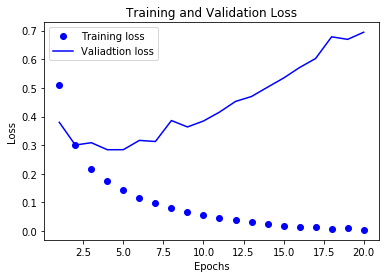

In [24]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Valiadtion loss')

plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

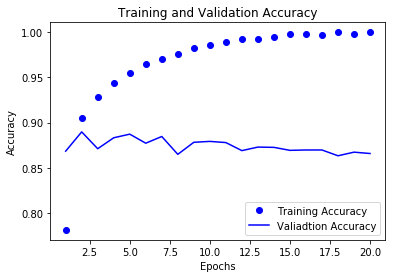

In [25]:
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Valiadtion Accuracy')

plt.title('Training and Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### This over here is a classic case of overfitting. As the validation loss reaches a minima at Epoch 3. We can train the model for 3-4 epochs for good general results as the model starts to overfit after that. 

In [26]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 1s 51us/step


In [27]:
results

[0.7697020271730423, 0.8496]

In [28]:
model.predict(x_test)

array([[0.00524731],
       [0.9999999 ],
       [0.9105992 ],
       ...,
       [0.00158708],
       [0.00558735],
       [0.46269003]], dtype=float32)